In [20]:
import cooltools
import cooler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


in_dir = "/mnt/c/Users/Marti/Documents/Projects/HK_Interactions/Data/HiC/SRA/"

In [9]:
mcool_file = 'GM12878-HindIII-allReps-filtered.mcool'
mcool_file = 'K562-HindIII-allReps-filtered.mcool'
resolution = 1000000
#load a cool data
cool_data = cooler.Cooler(in_dir + mcool_file + "::resolutions/" + str(resolution))
cool_matrix = cool_data.matrix(balance=True, as_pixels=True, join=True)[:]
cool_matrix


,chrom1,start1,end1,chrom2,start2,end2,count,balanced
0,chr1,0,1000000,chr1,0,1000000,16844,0.138459
1,chr1,0,1000000,chr1,1000000,2000000,3148,0.038244
2,chr1,0,1000000,chr1,2000000,3000000,332,0.004826
3,chr1,0,1000000,chr1,3000000,4000000,228,0.002806
4,chr1,0,1000000,chr1,4000000,5000000,128,0.001592
...,...,...,...,...,...,...,...,...
4050734,chrX,154000000,155000000,chrX,155000000,156000000,7544,0.142772
4050735,chrX,154000000,155000000,chrX,156000000,156040895,80,NaN
4050736,chrX,155000000,156000000,chrX,155000000,156000000,28094,0.500701
4050737,chrX,155000000,156000000,chrX,156000000,156040895,372,NaN


In [12]:
# remove inter-chromosomal interactions
cool_matrix = cool_matrix[cool_matrix['chrom1'] == cool_matrix['chrom2']]
#visualize the filtered data
cool_matrix.groupby(['chrom1']).size()

chrom1
chr1     26484
chr2     29418
chr3     19713
chr4     18164
chr5     16355
chr6     14574
chr7     12677
chr8     10605
chr9      7644
chr10     8934
chr11     9226
chr12     8855
chr13     4753
chr14     4024
chr15     3565
chr16     3457
chr17     3453
chr18     3070
chr19     1657
chr20     2096
chr21      851
chr22      779
chrX     12010
dtype: int64

In [13]:
# I want to test how to transform the balanced counts into log10 by chrom1
test = cool_matrix

#add log10 of balanced counts
tmp_data = test.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
test['log10_balanced'] = tmp_data
test

,chrom1,start1,end1,chrom2,start2,end2,count,balanced,log10_balanced
0,chr1,0,1000000,chr1,0,1000000,16844,0.138459,-0.858680
1,chr1,0,1000000,chr1,1000000,2000000,3148,0.038244,-1.417435
2,chr1,0,1000000,chr1,2000000,3000000,332,0.004826,-2.316379
3,chr1,0,1000000,chr1,3000000,4000000,228,0.002806,-2.551865
4,chr1,0,1000000,chr1,4000000,5000000,128,0.001592,-2.797943
...,...,...,...,...,...,...,...,...,...
4050734,chrX,154000000,155000000,chrX,155000000,156000000,7544,0.142772,-0.845357
4050735,chrX,154000000,155000000,chrX,156000000,156040895,80,NaN,NaN
4050736,chrX,155000000,156000000,chrX,155000000,156000000,28094,0.500701,-0.300422
4050737,chrX,155000000,156000000,chrX,156000000,156040895,372,NaN,NaN


In [18]:

# I would like to create a for loop by chromosome to scale the log10_balanced counts

#obtain the list of chromosomes
chrom_list = test['chrom1'].unique()

#create matrix to store the scaled values
scaled_matrix = list()

#for loop
for chrom in chrom_list:
    tmp_data = test[test['chrom1'] == chrom]
    tmp_data.loc[:,'scaled'] = scaler.fit_transform(tmp_data['log10_balanced'].values.reshape(-1, 1))
    scaled_matrix.append(tmp_data)

scaled_matrix[10]


/tmp/ipykernel_45340/1053392251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data.loc[:,'scaled'] = scaler.fit_transform(tmp_data['log10_balanced'].values.reshape(-1, 1))
/tmp/ipykernel_45340/1053392251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_data.loc[:,'scaled'] = scaler.fit_transform(tmp_data['log10_balanced'].values.reshape(-1, 1))
/tmp/ipykernel_45340/1053392251.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,chrom1,start1,end1,chrom2,start2,end2,count,balanced,log10_balanced,scaled
3427988,chr11,0,1000000,chr11,0,1000000,35270,0.661076,-0.179749,4.384514
3427989,chr11,0,1000000,chr11,1000000,2000000,5642,0.114751,-0.940244,2.996971
3427990,chr11,0,1000000,chr11,2000000,3000000,1662,0.029004,-1.537544,1.907182
3427991,chr11,0,1000000,chr11,3000000,4000000,972,0.013397,-1.873005,1.295124
3427992,chr11,0,1000000,chr11,4000000,5000000,364,0.005261,-2.278907,0.554547
...,...,...,...,...,...,...,...,...,...,...
3563935,chr11,133000000,134000000,chr11,134000000,135000000,8824,0.084759,-1.071814,2.756918
3563936,chr11,133000000,134000000,chr11,135000000,135086622,324,NaN,NaN,NaN
3564915,chr11,134000000,135000000,chr11,134000000,135000000,36856,0.315167,-0.501459,3.797545
3564916,chr11,134000000,135000000,chr11,135000000,135086622,1706,NaN,NaN,NaN


In [23]:
#merge the scaled data in a single dataframe
# scaled_matrix = pd.concat(scaled_matrix)
scaled_matrix.groupby('chrom1').size()

chrom1
chr1     26484
chr2     29418
chr3     19713
chr4     18164
chr5     16355
chr6     14574
chr7     12677
chr8     10605
chr9      7644
chr10     8934
chr11     9226
chr12     8855
chr13     4753
chr14     4024
chr15     3565
chr16     3457
chr17     3453
chr18     3070
chr19     1657
chr20     2096
chr21      851
chr22      779
chrX     12010
dtype: int64

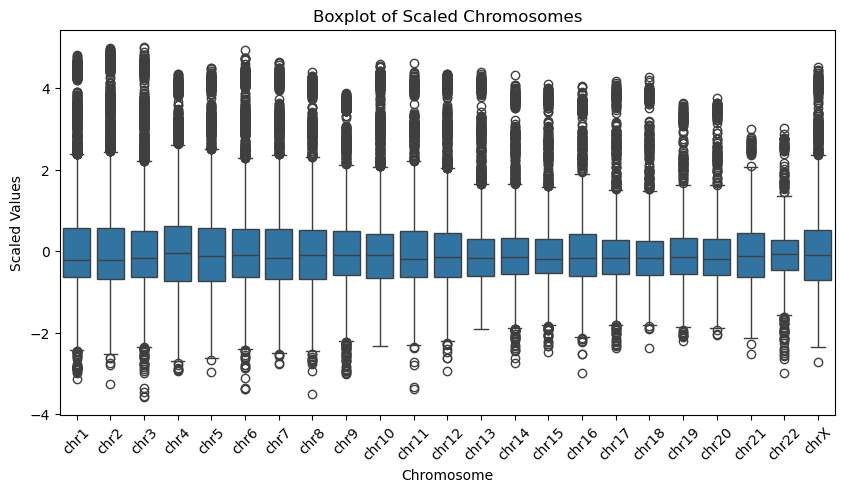

In [24]:
#finally let's plot the scaled chormosomes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_matrix, x='chrom1', y='scaled')
plt.title('Boxplot of Scaled Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.show()


In [74]:
# lets obtain the scaled log10 of balanced counts
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp_data= test.groupby('chrom1')['log10_balanced']
tmp_data = scaler.fit_transform(tmp_data)
# transform(lambda x: scaler.fit_transform(x))
# test['scaled_log10_balanced'] = tmp_data
tmp_data


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (23, 2) + inhomogeneous part.

In [68]:
#dimension of cool matrix
cool_matrix.shape

(27902, 9)

In [15]:
#test in chromosome 1
test = cool_matrix[cool_matrix['chrom1'] == 'chr1']
#scale the balance values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test['scaled'] = scaler.fit_transform(test['balanced'].values.reshape(-1, 1))	
test

,chrom1,start1,end1,chrom2,start2,end2,count,balanced,scaled
229,chr1,0,1000000,chr2,0,1000000,44,0.000486,0.728973
230,chr1,0,1000000,chr2,1000000,2000000,22,0.000304,0.203057
231,chr1,0,1000000,chr2,2000000,3000000,14,0.000174,-0.174375
232,chr1,0,1000000,chr2,3000000,4000000,36,0.000345,0.320632
233,chr1,0,1000000,chr2,4000000,5000000,56,0.000796,1.627870
...,...,...,...,...,...,...,...,...,...
27897,chr1,9000000,10000000,chrX,151000000,152000000,6,0.000070,-0.475596
27898,chr1,9000000,10000000,chrX,152000000,153000000,6,0.000077,-0.456187
27899,chr1,9000000,10000000,chrX,153000000,154000000,22,0.000293,0.169135
27900,chr1,9000000,10000000,chrX,154000000,155000000,22,0.000312,0.224981


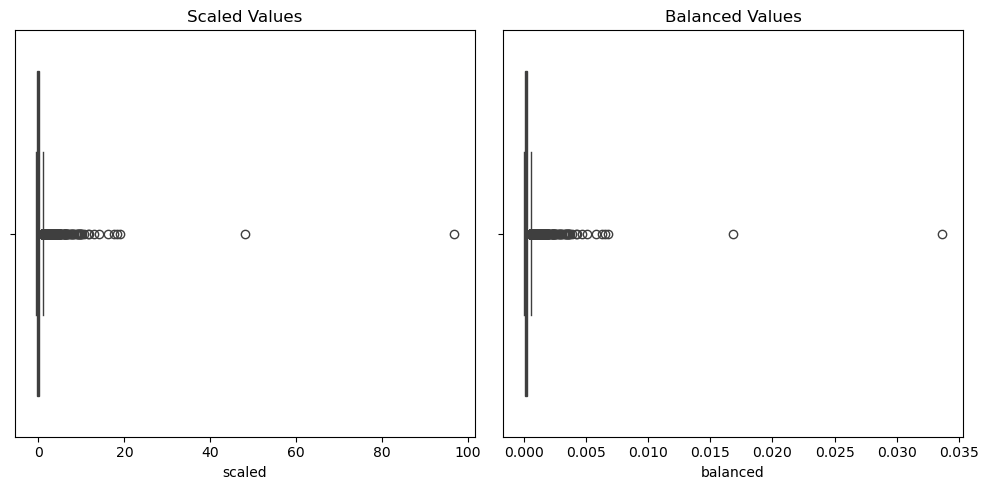

In [18]:


import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of scaled values and balanced values side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=test['scaled'])
plt.title('Scaled Values')

plt.subplot(1, 2, 2)
sns.boxplot(x=test['balanced'])
plt.title('Balanced Values')

plt.tight_layout()
plt.show()


In [19]:
#test transforming the balanced values by log10
test['log10'] = np.log10(test['balanced'])

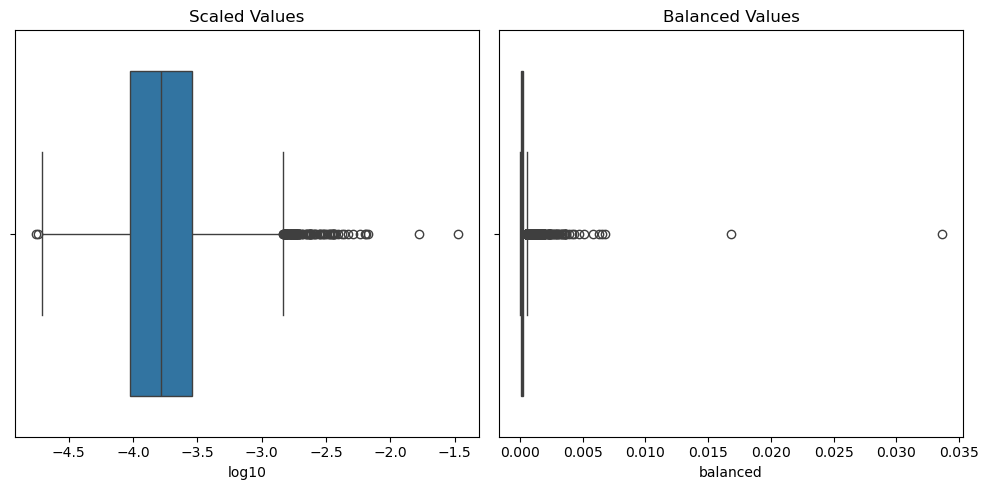

In [20]:
#plot the log10 transformed values side by side with the balanced values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=test['log10'])
plt.title('Scaled Values')

plt.subplot(1, 2, 2)
sns.boxplot(x=test['balanced'])
plt.title('Balanced Values')

plt.tight_layout()
plt.show()


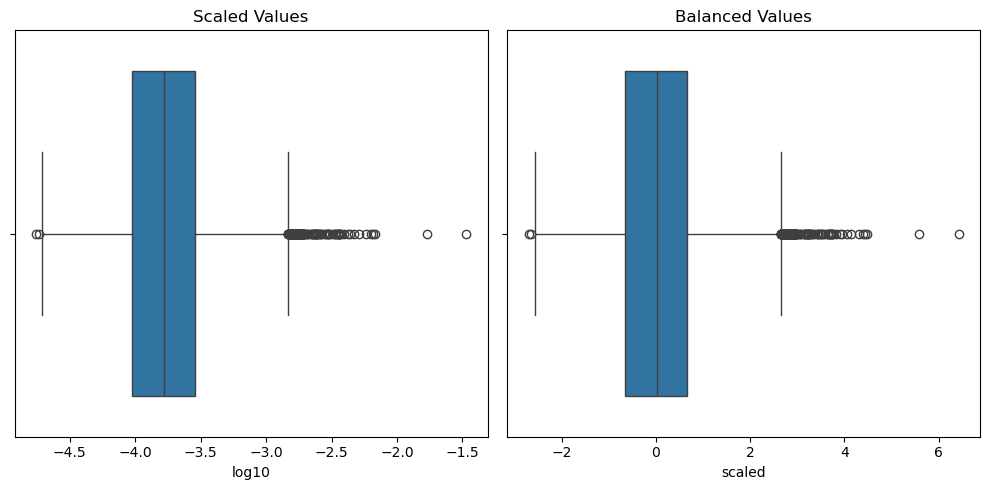

In [22]:
#test transforming the scaled values by log10
test['log10'] = np.log10(test['balanced'])

#scale the log10 transformed values
test['scaled'] = scaler.fit_transform(test['log10'].values.reshape(-1, 1))

#plot the log10 transformed values side by side with the balanced values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=test['log10'])
plt.title('Scaled Values')

plt.subplot(1, 2, 2)
sns.boxplot(x=test['scaled'])
plt.title('Balanced Values')

plt.tight_layout()
plt.show()

#this looks better


In [33]:
# Now, let's try to scale by chromosome 
# First, let's get the list of chromosomes
chroms = cool_data.chromnames

# Group by chromosome
cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
cool_matrix

/tmp/ipykernel_32395/2642871418.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))


,chrom1,start1,end1,chrom2,start2,end2,count,balanced,log10_balanced
229,chr1,0,1000000,chr2,0,1000000,44,0.000486,-3.313587
230,chr1,0,1000000,chr2,1000000,2000000,22,0.000304,-3.516820
231,chr1,0,1000000,chr2,2000000,3000000,14,0.000174,-3.759618
232,chr1,0,1000000,chr2,3000000,4000000,36,0.000345,-3.462434
233,chr1,0,1000000,chr2,4000000,5000000,56,0.000796,-3.099070
...,...,...,...,...,...,...,...,...,...
27897,chr1,9000000,10000000,chrX,151000000,152000000,6,0.000070,-4.155164
27898,chr1,9000000,10000000,chrX,152000000,153000000,6,0.000077,-4.115446
27899,chr1,9000000,10000000,chrX,153000000,154000000,22,0.000293,-3.533866
27900,chr1,9000000,10000000,chrX,154000000,155000000,22,0.000312,-3.506148
